<a href="https://colab.research.google.com/github/pavannanaiah/movies/blob/main/Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Collection


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from numpy import NAN
import re
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns



In [ ]:
# Basic Data Collection

def imdb_bacic_movie_data(start_fetch,number_of_records_per_search,start_last_page,number_of_votes):

  # start_fetch = 1
  # number_of_records_per_search = 50
  # start_last_page = 201
  # number_of_votes = 70

  movie_data = pd.DataFrame()
  movie_data_subset = pd.DataFrame()

  while start_fetch <= start_last_page:

    url = "https://www.imdb.com/search/title/?title_type=feature&release_date=2021-01-01,2023-09-30&num_votes="+str(number_of_votes)+",&count="+str(number_of_records_per_search)+"&start=" +str(start_fetch)+"&ref_=adv_nxt"
    print (url)
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        movie_headers = soup.find_all('div', class_='lister-item mode-advanced')

        movie_ids = []
        movie_names = []
        movie_genres = []
        movie_years = []
        movie_ratings = []
        movie_durations = []
        movie_votes = []

        for header in movie_headers:

            href = header.find('a')['href']
            movie_id = href.split('/')[2] if href.startswith('/title/') else ''

            movie_name = header.find('h3', class_='lister-item-header').find('a').text.strip()
            if (header.find('p', class_='text-muted').find('span', class_='genre') !=None):
                movie_genre = header.find('p', class_='text-muted').find('span', class_='genre').text.strip()
            else:
                movie_genre =" "
            movie_year = header.find('span', class_='lister-item-year').text.strip('()')

            rating_div = header.find('div', class_='ratings-imdb-rating')
            movie_rating = rating_div['data-value']
            #print(rating_div)

            if (header.find('p', class_='text-muted').find('span', class_='runtime') !=None):
                movie_duration = header.find('p', class_='text-muted').find('span', class_='runtime').text.strip()
            else:
                    movie_duration =" "

            vote_text = header.find('span', attrs={"name":"nv"})
            movie_vote = vote_text['data-value'] if vote_text else ''

            movie_ids.append(movie_id)
            movie_names.append(movie_name)
            movie_genres.append(movie_genre)
            movie_years.append(movie_year)
            movie_ratings.append(movie_rating)
            movie_durations.append(movie_duration)
            movie_votes.append(movie_vote)


        movie_data_subset = pd.DataFrame({'Movie ID':movie_ids,'Movie Name': movie_names,
                                  'Movie Genre': movie_genres, 'Movie Year': movie_years,
                                  'Movie Rating':movie_ratings,'Movie Duration': movie_durations,
                                  'Movie Votes': movie_votes})
        movie_data = pd.concat([movie_data, movie_data_subset], ignore_index=True)
        #print(movie_data)
    else:
      movie_data = None

    start_fetch += number_of_records_per_search

  return movie_data

In [ ]:
# Collect Budget , Revenue Data and Language
def imdb_extended_movie_data(movie_data):
  movie_languages = []
  movie_revenues = []
  movie_budgets = []


  for index, movie in movie_data.iterrows():
    url = "https://www.imdb.com/title/" + movie["Movie ID"]
    print(url)

    HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

    response = requests.get(url, headers= HEADERS)

    if response.status_code == 200:
      soup = BeautifulSoup(response.text, 'html.parser')

      money_element = soup.find("div", {"data-testid": "title-boxoffice-section"})
      languages = soup.find("li", {"data-testid": "title-details-languages"})
      #print (languages)
      if (money_element != None):
        #For budget
        if money_element.find("li", {"data-testid": "title-boxoffice-budget"}) != None:
          budget = money_element.find("li", {"data-testid": "title-boxoffice-budget"}).text.strip()
        else:
          budget = " "
        #print(budget)

      #For revenue
        if money_element.find("li", {"data-testid": "title-boxoffice-cumulativeworldwidegross"}) != None:
          revenue =  money_element.find("li", {"data-testid": "title-boxoffice-cumulativeworldwidegross"}).text.strip()
        else:
          revenue = " "

        #For langauges
        if languages != None:
            language_links = languages.find_all("a", {"class": "ipc-metadata-list-item__list-content-item--link"})
            languages = ', '.join([link.text.strip() for link in language_links])
        else:
            language_links = " "


        movie_budget = budget
        movie_revenue = revenue
        movie_language = languages
      else:
        movie_budget = " "
        movie_revenue = " "

      movie_budgets.append(movie_budget.replace("Budget","").replace(" (estimated)","").replace("$",""))
      movie_revenues.append(movie_revenue.replace("Gross worldwide","").replace("$",""))
      movie_languages.append(languages)

    else:
      movie_budgets.append(" ")
      movie_revenues.append(" ")
      movie_languages.append(" ")


  movie_data['Movie Budget'] = movie_budgets
  movie_data['Movie Revenue'] = movie_revenues
  movie_data['Movie Languages'] = movie_languages

  return movie_data



In [ ]:
#This part of the code is to extract data from IMDB and save it to csv.
#Executing this mutiple time is resource intensive. So run it once and save to csv.
#Import from CSV for next user

# movie_data = imdb_bacic_movie_data(1,250,9751,70)
movie_data = imdb_bacic_movie_data(1,50,1,70)
movie_data.head()

# movie_data.to_csv('BasicMovieData.csv')

# movie_data_extended = imdb_extended_movie_data(movie_data)
# movie_data_extended.head()
# movie_data_extended.to_csv('BasicMovieData.csv')

# movie_data_extended.head()

https://www.imdb.com/search/title/?title_type=feature&release_date=2021-01-01,2023-09-30&num_votes=70,&count=50&start=1&ref_=adv_nxt
https://www.imdb.com/title/tt13274016
https://www.imdb.com/title/tt11858890
https://www.imdb.com/title/tt21807222
https://www.imdb.com/title/tt15789472
https://www.imdb.com/title/tt14509110
https://www.imdb.com/title/tt1695843
https://www.imdb.com/title/tt17024450
https://www.imdb.com/title/tt5537002
https://www.imdb.com/title/tt1517268
https://www.imdb.com/title/tt10160976
https://www.imdb.com/title/tt22687790
https://www.imdb.com/title/tt22041854
https://www.imdb.com/title/tt10638522
https://www.imdb.com/title/tt7599146
https://www.imdb.com/title/tt15398776
https://www.imdb.com/title/tt16304446
https://www.imdb.com/title/tt9224104
https://www.imdb.com/title/tt11426232
https://www.imdb.com/title/tt9603212
https://www.imdb.com/title/tt4495098
https://www.imdb.com/title/tt15789038
https://www.imdb.com/title/tt3291150
https://www.imdb.com/title/tt15334488
h

,Movie ID,Movie Name,Movie Genre,Movie Year,Movie Rating,Movie Duration,Movie Votes,Movie Budget,Movie Revenue,Movie Languages
0,tt13274016,Reptile,"Crime, Drama, Mystery",2023,6.9,134 min,34620,,,"[[Language], [[<li class=""ipc-inline-list__ite..."
1,tt11858890,The Creator,"Action, Adventure, Drama",2023,7.2,133 min,35237,"80,000,000","64,426,699",English
2,tt21807222,Saw X,"Horror, Mystery, Thriller",2023,7.1,118 min,17456,"13,000,000","58,824,358",English
3,tt15789472,Nowhere,"Drama, Thriller",II) (2023,6.4,109 min,15350,,,"[[Language], [[<li class=""ipc-inline-list__ite..."
4,tt14509110,No One Will Save You,"Horror, Sci-Fi, Thriller",2023,6.3,93 min,36763,,,"[[Language], [[<li class=""ipc-inline-list__ite..."


In [ ]:
#Load data from CSV to dataframe for further proccessing
def load_data_from_csv():
  movies_data = pd.read_csv("/content/sample_data/MoviesDataComplete.csv")

  return movies_data


## Data clean up process

In [ ]:
def characters_before_first_number(input_string):
    match = re.search(r'^([^0-9]+)', input_string)
    if match:
        return match.group(1)
    else:
        return ''


def extract_numbers(input_string):
    numbers = re.findall(r'\d+', input_string)
    result = ''.join(numbers)
    return result


In [ ]:

movie_data = load_data_from_csv()
movie_data.head()

#Remove non-numeric characters from Movie year column
movie_year_cleaned = movie_data.copy()
movie_year_cleaned['Movie Year Cleaned'] = movie_year_cleaned['Movie Year'].str.extract('(\d+)') # Retain only the numeric part of the data
del movie_year_cleaned['Movie Year'] # drop the column Movie Year
#movie_year_cleaned.head()

#Remove non-numeric characters from Movie Duration column
movie_duration_cleaned = movie_year_cleaned.copy()
movie_duration_cleaned['Movie Duration Cleaned'] = movie_year_cleaned['Movie Duration'].str.extract('(\d+)') # Retain only the numeric part of the data
del movie_duration_cleaned['Movie Duration'] # drop the column Movie Duration
movie_duration_cleaned.head()



,Unnamed: 0,Movie ID,Movie Name,Movie Genre,Movie Rating,Movie Votes,Movie Budget,Movie Revenue,Movie Languages,Movie Year Cleaned,Movie Duration Cleaned
0,0,tt13274016,Reptile,"Crime, Drama, Mystery",6.9,31993,,,"<li class=""ipc-metadata-list__item"" data-testi...",2023,134
1,1,tt11858890,The Creator,"Action, Adventure, Drama",7.2,33444,"80,000,000","63,857,162",English,2023,133
2,2,tt21807222,Saw X,"Horror, Mystery, Thriller",7.1,16361,"13,000,000","58,203,398",English,2023,118
3,3,tt15789472,Nowhere,"Drama, Thriller",6.4,14078,,,"<li class=""ipc-metadata-list__item"" data-testi...",2023,109
4,4,tt14509110,No One Will Save You,"Horror, Sci-Fi, Thriller",6.3,35639,,,"<li class=""ipc-metadata-list__item"" data-testi...",2023,93


In [ ]:
#Movie Budget column clean up

# #Get List of all starting characters of the buget column.
# #This will list all the currency symbols.

# first_characters = movie_budget_cleaned['Movie Budget'].str[0]
# unique_first_characters = first_characters.unique()
# print (f'unique characters : {unique_first_characters}')

#Currency converstion to USD based on rated from 10/15/2023 (source : Google.com)
currency_dictionary = {'₹':0.012,'€':1.05,'SEK':0.091,'SGD':0.73,'CA':0.73,'CN¥':0.137,
                       'CZK':0.043,'CHF':1.11,'COP':0.00023,'A':0.63,'NT':0.0310,
                       'NOK':0.091,'NZ':0.5694,'NPR':0.0075,'NGN':0.0013,'₩':0.00074,
                       'RUR':0.010,'R':0.20,'RON':4.72,'IDR':0.000064,'IQD':0.00076,
                       'IRR':0.000024,'£':1.22,'PKR':0.0036,'PLN':0.24,'¥':0.0067,
                       'MYR':0.21,'MX':0.055,'HUF':0.0027,'HK':0.12,'EGP':0.032,
                       'BGL':0.54,'BDT':0.0091,'UAH':0.027,'DKK':0.14,'DOP':0.018,
                       '₱':0.0176,'TRL':0.036,'ZAR':0.053,
                       'SEK\xa0':0.091,'NOK\xa0':0.091,'RUR\xa0':0.010,'IDR\xa0':0.000064,
                       'PKR\xa0':0.0036,'MYR\xa0':0.21,'HUF\xa0':0.0027,'EGP\xa0':0.032,
                       'BDT\xa0':0.0091,'CZK\xa0':0.043,'IQD\xa0':0.00076,
                       'UAH\xa0':0.027,'CHF\xa0':1.11,'DKK\xa0':0.14,'IRR\xa0':0.000024,
                       'RON\xa0':4.72,'NPR\xa0':0.0075,'BGL\xa0':0.54,'NGN\xa0':0.0013,
                       'DOP\xa0':0.018,'PLN\xa0':0.24,'SGD\xa0':0.73,'COP\xa0':0.00023,
                       'TRL\xa0':0.036,'ZAR\xa0':0.053}

movie_budget_cleaned = movie_duration_cleaned.copy()

movie_budget_cleaned_list = []


for index, movie in movie_budget_cleaned.iterrows():
  currency = characters_before_first_number(movie['Movie Budget'])
  movie_budget = ''
  if(currency !='' and movie['Movie Budget'] !=' ' and movie['Movie Budget'] !=''):
    # print({movie['Movie Name']},{movie['Movie Budget']})
    # print(f'currency : {currency}')
    # print(extract_numbers(movie['Movie Budget']))
    # print(int(currency_dictionary[currency]))
    # print(int(extract_numbers(movie['Movie Budget'])) * float(currency_dictionary[currency]))

    movie_budget = int(extract_numbers(movie['Movie Budget'])) * float(currency_dictionary[currency])
  else:
    #print({'else',movie['Movie Name']},{movie['Movie Budget']})
    movie_budget = movie['Movie Budget']
    #do Something else
  #print(movie_budget)
  movie_budget_cleaned_list.append(movie_budget)

movie_budget_cleaned['Movie Budget Cleaned']  = movie_budget_cleaned_list
del movie_budget_cleaned['Movie Budget'] # drop the column Movie Budget
movie_budget_cleaned.head()



,Unnamed: 0,Movie ID,Movie Name,Movie Genre,Movie Rating,Movie Votes,Movie Revenue,Movie Languages,Movie Year Cleaned,Movie Duration Cleaned,Movie Budget Cleaned
0,0,tt13274016,Reptile,"Crime, Drama, Mystery",6.9,31993,,"<li class=""ipc-metadata-list__item"" data-testi...",2023,134,
1,1,tt11858890,The Creator,"Action, Adventure, Drama",7.2,33444,"63,857,162",English,2023,133,"80,000,000"
2,2,tt21807222,Saw X,"Horror, Mystery, Thriller",7.1,16361,"58,203,398",English,2023,118,"13,000,000"
3,3,tt15789472,Nowhere,"Drama, Thriller",6.4,14078,,"<li class=""ipc-metadata-list__item"" data-testi...",2023,109,
4,4,tt14509110,No One Will Save You,"Horror, Sci-Fi, Thriller",6.3,35639,,"<li class=""ipc-metadata-list__item"" data-testi...",2023,93,


In [ ]:
movie_budget_cleaned.to_csv("Cleaned_year_duration_budget.csv")

In [ ]:
#Movie Langauage column clean up
movie_language_cleaned = movie_budget_cleaned.copy()

movie_language_cleaned_list = []


for index, movie in movie_budget_cleaned.iterrows():
  #print(movie["Movie Name"], movie["Movie Languages"] )
  if(movie["Movie Languages"] is None):
    movie_language = " "
  else:
    if '<li class' in movie["Movie Languages"]:
      soup = BeautifulSoup(movie["Movie Languages"], 'html.parser')
      language_li = soup.find('li', attrs={'class': 'ipc-metadata-list__item', 'data-testid': 'title-details-languages'})
      language_a = language_li.find('a', attrs={'class': 'ipc-metadata-list-item__list-content-item--link'})
      movie_language = language_a.text
    else:
      movie_language = movie["Movie Languages"]

  movie_language_cleaned_list.append(movie_language)

movie_language_cleaned['Movie Languages Cleaned']  = movie_language_cleaned_list
del movie_language_cleaned['Movie Languages'] # drop the column Movie Language
movie_language_cleaned.head()



Streaming output truncated to the last 5000 lines.
Last Shoot Out <li class="ipc-metadata-list__item" data-testid="title-details-languages" role="presentation"><span aria-disabled="false" class="ipc-metadata-list-item__label">Language</span><div class="ipc-metadata-list-item__content-container"><ul class="ipc-inline-list ipc-inline-list--show-dividers ipc-inline-list--inline ipc-metadata-list-item__list-content base" role="presentation"><li class="ipc-inline-list__item" role="presentation"><a aria-disabled="false" class="ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link" href="/search/title?title_type=feature&amp;primary_language=en&amp;sort=moviemeter,asc&amp;ref_=tt_dt_ln" role="button" tabindex="0">English</a></li></ul></div></li>
Nazar Andaaz <li class="ipc-metadata-list__item" data-testid="title-details-languages" role="presentation"><span aria-disabled="false" class="ipc-metadata-list-item__label">Language</span><div class="ipc-metadata-lis

,Unnamed: 0,Movie ID,Movie Name,Movie Genre,Movie Rating,Movie Votes,Movie Revenue,Movie Year Cleaned,Movie Duration Cleaned,Movie Budget Cleaned,Movie Languages Cleaned
0,0,tt13274016,Reptile,"Crime, Drama, Mystery",6.9,31993,,2023,134,,English
1,1,tt11858890,The Creator,"Action, Adventure, Drama",7.2,33444,"63,857,162",2023,133,"80,000,000",English
2,2,tt21807222,Saw X,"Horror, Mystery, Thriller",7.1,16361,"58,203,398",2023,118,"13,000,000",English
3,3,tt15789472,Nowhere,"Drama, Thriller",6.4,14078,,2023,109,,Spanish
4,4,tt14509110,No One Will Save You,"Horror, Sci-Fi, Thriller",6.3,35639,,2023,93,,English


In [ ]:
#Rename columns
df_movies.rename(columns = {'Movie Year Cleaned':'Movie Year'}, inplace = True)
df_movies.rename(columns = {'Movie Duration Cleaned':'Movie Duration'}, inplace = True)
df_movies.rename(columns = {'Movie Budget Cleaned':'Movie Budget'}, inplace = True)
df_movies.rename(columns = {'Movie Languages Cleaned':'Movie Languages'}, inplace = True)

In [ ]:
df_movies.head

<bound method NDFrame.head of         Movie ID            Movie Name                Movie Genre  \
0     tt13274016               Reptile      Crime, Drama, Mystery   
1     tt11858890           The Creator   Action, Adventure, Drama   
2     tt21807222                 Saw X  Horror, Mystery, Thriller   
3     tt15789472               Nowhere            Drama, Thriller   
4     tt14509110  No One Will Save You   Horror, Sci-Fi, Thriller   
...          ...                   ...                        ...   
9995  tt16974912      Varma Veedu Teda            Drama, Thriller   
9996  tt23727320                 @Love              Drama, Family   
9997  tt12883212               Vecírek                     Comedy   
9998  tt14837008                Padaka                     Action   
9999  tt14676768              Ieandavi                     Horror   

      Movie Rating  Movie Votes Movie Revenue  Movie Year  Movie Duration  \
0              6.9        31993                    2023.0       

In [ ]:
#Delete rows that are not usefull for this analysis

#if Revenue and Buget is empty, delete the row
condition = (df_movies['Movie Budget'].str.strip().str.len() > 0) & (df_movies['Movie Revenue'].str.strip().str.len() > 0)
df_movies_filtered = df_movies[condition]

df_movies_filtered.head

<bound method NDFrame.head of         Movie ID        Movie Name                 Movie Genre  Movie Rating  \
1     tt11858890       The Creator    Action, Adventure, Drama           7.2   
2     tt21807222             Saw X   Horror, Mystery, Thriller           7.1   
5      tt1695843   Haunted Mansion       Comedy, Drama, Family           6.1   
6     tt17024450   The Equalizer 3     Action, Crime, Thriller           7.0   
8      tt1517268            Barbie  Adventure, Comedy, Fantasy           7.1   
...          ...               ...                         ...           ...   
9879  tt19404382  Moy papa - vozhd   Adventure, Comedy, Family           3.8   
9947  tt21990786  Kalendar ma(y)ya   Adventure, Family, Sci-Fi           5.1   
9948  tt15709222      Den mertvykh                       Drama           6.2   
9975  tt10940890           Müfreze                 Action, War           6.5   
9984   tt7987842           Zayed 9     Action, Mystery, Sci-Fi           7.2   

      Mov

In [ ]:
df_movies_filtered.shape

df_movies_filtered.to_csv("removed_empty_revenue_budget.csv")

In [ ]:
df_movies_filtered = pd.read_csv('/content/removed_empty_revenue_budget.csv')

In [ ]:
#Calculate % of revenue genereated
df_movies_filtered['Movie Revenue'] = df_movies_filtered['Movie Revenue'].str.replace(',', '')
df_movies_filtered['Movie Budget'] = df_movies_filtered['Movie Budget'].str.replace(',', '')
df_movies_filtered.head

df_movies_filtered['Revenue %'] = round((pd.to_numeric(df_movies_filtered['Movie Revenue'], errors='coerce') / pd.to_numeric(df_movies_filtered['Movie Budget'], errors='coerce'))*100,2)


df_movies_filtered.head


<bound method NDFrame.head of      Unnamed: 0    Movie ID        Movie Name                 Movie Genre  \
0             1  tt11858890       The Creator    Action, Adventure, Drama   
1             2  tt21807222             Saw X   Horror, Mystery, Thriller   
2             5   tt1695843   Haunted Mansion       Comedy, Drama, Family   
3             6  tt17024450   The Equalizer 3     Action, Crime, Thriller   
4             8   tt1517268            Barbie  Adventure, Comedy, Fantasy   
..          ...         ...               ...                         ...   
803        9879  tt19404382  Moy papa - vozhd   Adventure, Comedy, Family   
804        9947  tt21990786  Kalendar ma(y)ya   Adventure, Family, Sci-Fi   
805        9948  tt15709222      Den mertvykh                       Drama   
806        9975  tt10940890           Müfreze                 Action, War   
807        9984   tt7987842           Zayed 9     Action, Mystery, Sci-Fi   

     Movie Rating  Movie Votes Movie Revenue 

In [ ]:
# Perform binning on the Revenue % column
df_movies_filtered["Revenue % Bins"] = pd.cut(df_movies_filtered["Revenue %"],
                                                      bins=[50,90, 100, 200, 500, 40000],
                                                      labels=["Very Low","Low", "Medium", "High", "Very High"])
fig = px.histogram(df_movies_filtered, x="Revenue % Bins", title="Revenue % Bins",
                   category_orders={"Revenue % Bins":["Very Low", "Low", "Medium", "High", "Very High"]})
fig.show()


In [ ]:
#Scatter Plot
df_budget_sorted = df_movies_filtered.sort_values(by='Movie Budget', ascending=True)

fig = px.scatter(df_movies_filtered, x='Revenue % Bins', y='Movie Budget', title='Scatter Plot Movie Budget and Revenue %')
#fig = px.bar(df_budget_sorted, x='Revenue % Bins', y='Movie Budget' ,title='Bar Plot Movie Budget and Revenue %')

# Show the plot
fig.show()

In [ ]:
# Perform binning on the Rating column
df_movies_filtered["Rating Bins"] = pd.cut(df_movies_filtered["Movie Rating"],
                                                      bins=[5,7,8.5,10],
                                                      labels=["Low", "Medium", "High"])
fig = px.histogram(df_movies_filtered, x="Rating Bins", title="Rating Bins",
                   category_orders={"Rating Bins":["Very Low", "Low", "Medium", "High"]})
fig.show()


In [ ]:
#Scatter Plot
df_budget_sorted = df_movies_filtered.sort_values(by='Movie Budget', ascending=True)

#fig = px.scatter(df_movies_filtered, x='Movie Budget', y='Revenue % Bins', title='Scatter Plot Movie Budget and Revenue %')
fig = px.scatter(df_budget_sorted, x='Rating Bins', y='Movie Budget' ,title='Bar Plot Rating Bins and Movie Budget')

# Show the plot
fig.show()

In [ ]:
#Convert Revenue and Budget to numeric
df_movies_filtered['Numeric Revenue'] = pd.to_numeric(df_movies_filtered['Movie Revenue'], errors='coerce')
df_movies_filtered['Numeric Budget'] = pd.to_numeric(df_movies_filtered['Movie Budget'], errors='coerce')

#df_movies_filtered['Revenue %'] = round((pd.to_numeric(df_movies_filtered['Movie Revenue'], errors='coerce') / pd.to_numeric(df_movies_filtered['Movie Budget'], errors='coerce'))*100,2)

In [ ]:
#Scatter Plot Movie Budget vs. Movie Rating

df_budget_rating = df_movies_filtered[df_movies_filtered['Numeric Budget']< 250000000]

fig = px.scatter(df_budget_rating, x='Movie Rating', y='Numeric Budget' ,title='Scatter Plot Movie Rating and Movie Budget',trendline='ols')
fig.update_xaxes(title_text='Movie Rating')
fig.update_yaxes(title_text='Movie Budget')
fig.data[1].line.color = 'red'

fig.show()

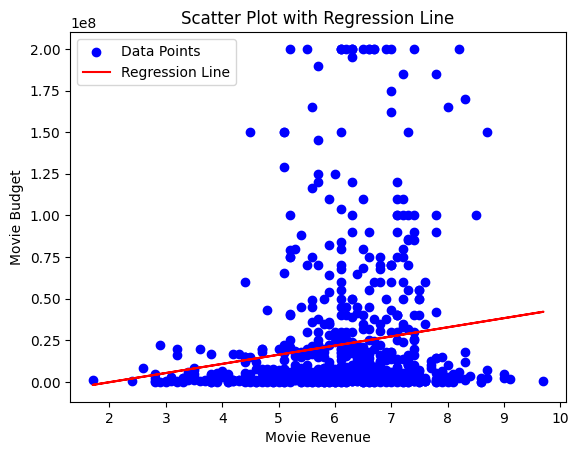

In [ ]:
x =df_budget_rating['Movie Rating']
y =df_budget_rating['Numeric Budget']
plt.scatter(x, y, label='Data Points', color='blue')

fit = np.polyfit(x, y, 1)  # 1 for linear regression
line = np.poly1d(fit)
plt.plot(x, line(x), label='Regression Line', color='red')

plt.xlabel('Movie Revenue')
plt.ylabel('Movie Budget')

plt.legend()
plt.title('Scatter Plot with Regression Line')

plt.show()

In [ ]:
#Scatter Plot Movie Budget vs. Movie Revenue

fig = px.scatter(df_movies_filtered, x='Numeric Revenue', y='Numeric Budget' ,title='Scatter Plot Movie Revenue and Movie Budget',trendline='ols')
fig.update_xaxes(title_text='Movie Revenue')
fig.update_yaxes(title_text='Movie Budget')
fig.data[1].line.color = 'red'

fig.show()

In [ ]:
#Scatter Plot Movie Budget vs. Movie Revenue
duplicate_df_movies_filtered = df_movies_filtered
df_budget_revenue = duplicate_df_movies_filtered[duplicate_df_movies_filtered['Numeric Revenue']< 1000000000]

# # #fig = px.scatter(df_movies_filtered, x='Movie Budget', y='Revenue % Bins', title='Scatter Plot Movie Budget and Revenue %')
fig = px.scatter(df_budget_revenue, x='Numeric Revenue', y='Numeric Budget' ,title='Scatter Plot Movie Revenue and Movie Budget',trendline='ols')

# # # Show the plot
fig.show()

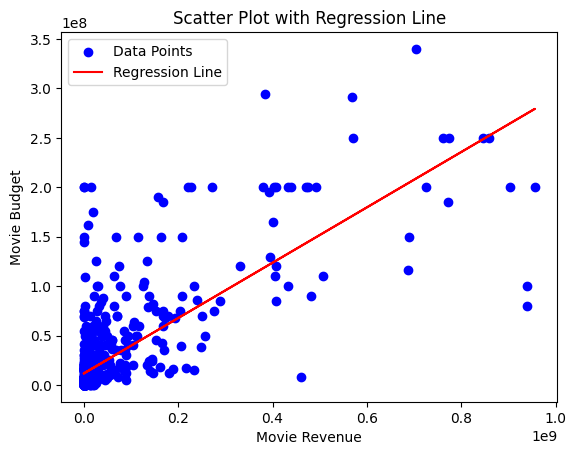

In [ ]:

x =df_budget_revenue['Numeric Revenue']
y =df_budget_revenue['Numeric Budget']
plt.scatter(x, y, label='Data Points', color='blue')

fit = np.polyfit(x, y, 1)  # 1 for linear regression
line = np.poly1d(fit)
plt.plot(x, line(x), label='Regression Line', color='red')

plt.xlabel('Movie Revenue')
plt.ylabel('Movie Budget')

plt.legend()
plt.title('Scatter Plot with Regression Line')

plt.show()

In [ ]:
columns_to_copy = ['Movie Budget', 'Movie Revenue', 'Movie Rating']

df_heatmap = df_movies_filtered[columns_to_copy].copy()
df_movies_filtered.head

<bound method NDFrame.head of      Unnamed: 0    Movie ID        Movie Name                 Movie Genre  \
0             1  tt11858890       The Creator    Action, Adventure, Drama   
1             2  tt21807222             Saw X   Horror, Mystery, Thriller   
2             5   tt1695843   Haunted Mansion       Comedy, Drama, Family   
3             6  tt17024450   The Equalizer 3     Action, Crime, Thriller   
4             8   tt1517268            Barbie  Adventure, Comedy, Fantasy   
..          ...         ...               ...                         ...   
803        9879  tt19404382  Moy papa - vozhd   Adventure, Comedy, Family   
804        9947  tt21990786  Kalendar ma(y)ya   Adventure, Family, Sci-Fi   
805        9948  tt15709222      Den mertvykh                       Drama   
806        9975  tt10940890           Müfreze                 Action, War   
807        9984   tt7987842           Zayed 9     Action, Mystery, Sci-Fi   

     Movie Rating  Movie Votes Movie Revenue 

Text(0.5, 1.0, 'Heatmap')

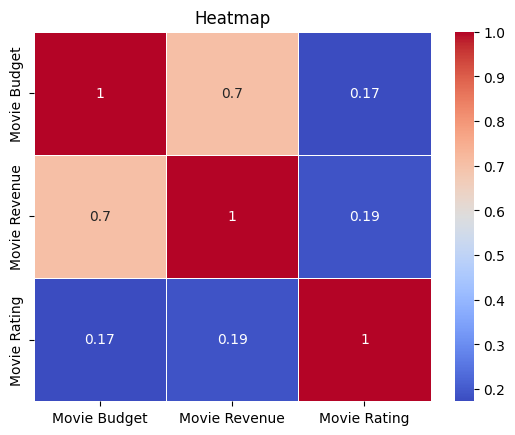

In [ ]:
df_heatmap = df_heatmap.apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_heatmap.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap')

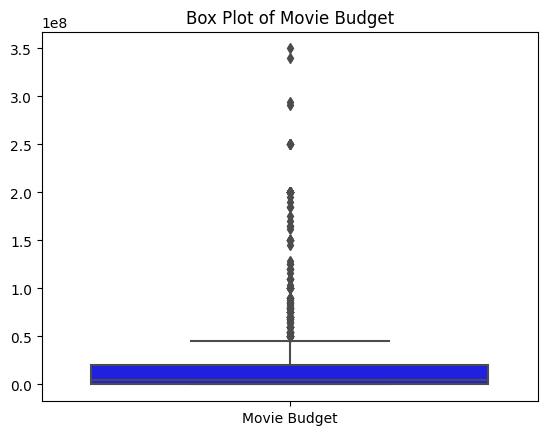

In [ ]:
columns_to_copy = ['Movie Budget']

df_box_budget = df_movies_filtered[columns_to_copy].copy()
df_box_budget = df_box_budget.apply(pd.to_numeric, errors='coerce')


sns.boxplot(df_box_budget, color='blue')

plt.title('Box Plot of Movie Budget')
plt.show()

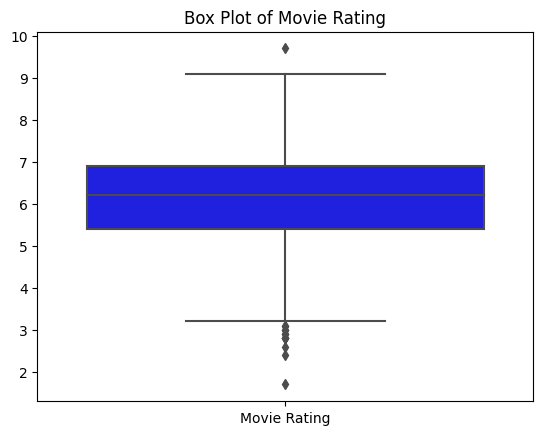

In [ ]:
columns_to_copy = ['Movie Rating']

df_box_rating = df_movies_filtered[columns_to_copy].copy()
df_box_budget = df_box_rating.apply(pd.to_numeric, errors='coerce')


sns.boxplot(df_box_rating, color='blue')

plt.title('Box Plot of Movie Rating')
plt.show()

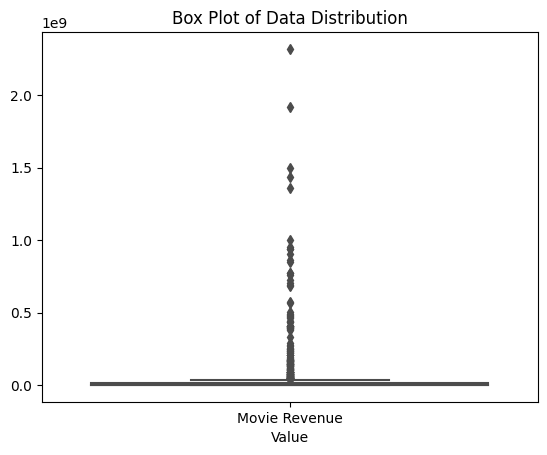

In [ ]:
columns_to_copy = ['Movie Revenue']

df_box_revenue = df_movies_filtered[columns_to_copy].copy()
df_box_revenue = df_box_revenue.apply(pd.to_numeric, errors='coerce')


sns.boxplot(df_box_revenue, color='blue')
plt.xlabel('Value')
plt.title('Box Plot of Data Distribution')
plt.show()

In [ ]:
df_movies = pd.read_csv ("/content/sample_data/AddedRevenue%.csv")

In [ ]:
# change revenue to 500% if the revenue % is > than 500%

# Capping all 'Revenue %' values greater than 500% to 500%
df_movies['Updated Revenue %'] = df_movies['Revenue %'].apply(lambda x: min(x, 500))

# Displaying the first few rows of the modified dataframe to verify the changes
df_movies.head()

,Unnamed: 0.1,Unnamed: 0,Movie ID,Movie Name,Movie Genre,Movie Rating,Movie Votes,Movie Revenue,Movie Year,Movie Duration,Movie Budget,Movie Languages,Revenue %,Updated Revenue %
0,0,1,tt11858890,The Creator,"Action, Adventure, Drama",7.2,33444,63857162,2023.0,133.0,80000000.0,English,79.82,79.82
1,1,2,tt21807222,Saw X,"Horror, Mystery, Thriller",7.1,16361,58203398,2023.0,118.0,13000000.0,English,447.72,447.72
2,2,5,tt1695843,Haunted Mansion,"Comedy, Drama, Family",6.1,21154,115657451,2023.0,123.0,150000000.0,"English, French, Spanish",77.10,77.10
3,3,6,tt17024450,The Equalizer 3,"Action, Crime, Thriller",7.0,40908,167825580,2023.0,109.0,70000000.0,"English, Italian",239.75,239.75
4,4,8,tt1517268,Barbie,"Adventure, Comedy, Fantasy",7.1,352742,1437746229,2023.0,114.0,100000000.0,"English, Spanish",1437.75,500.00


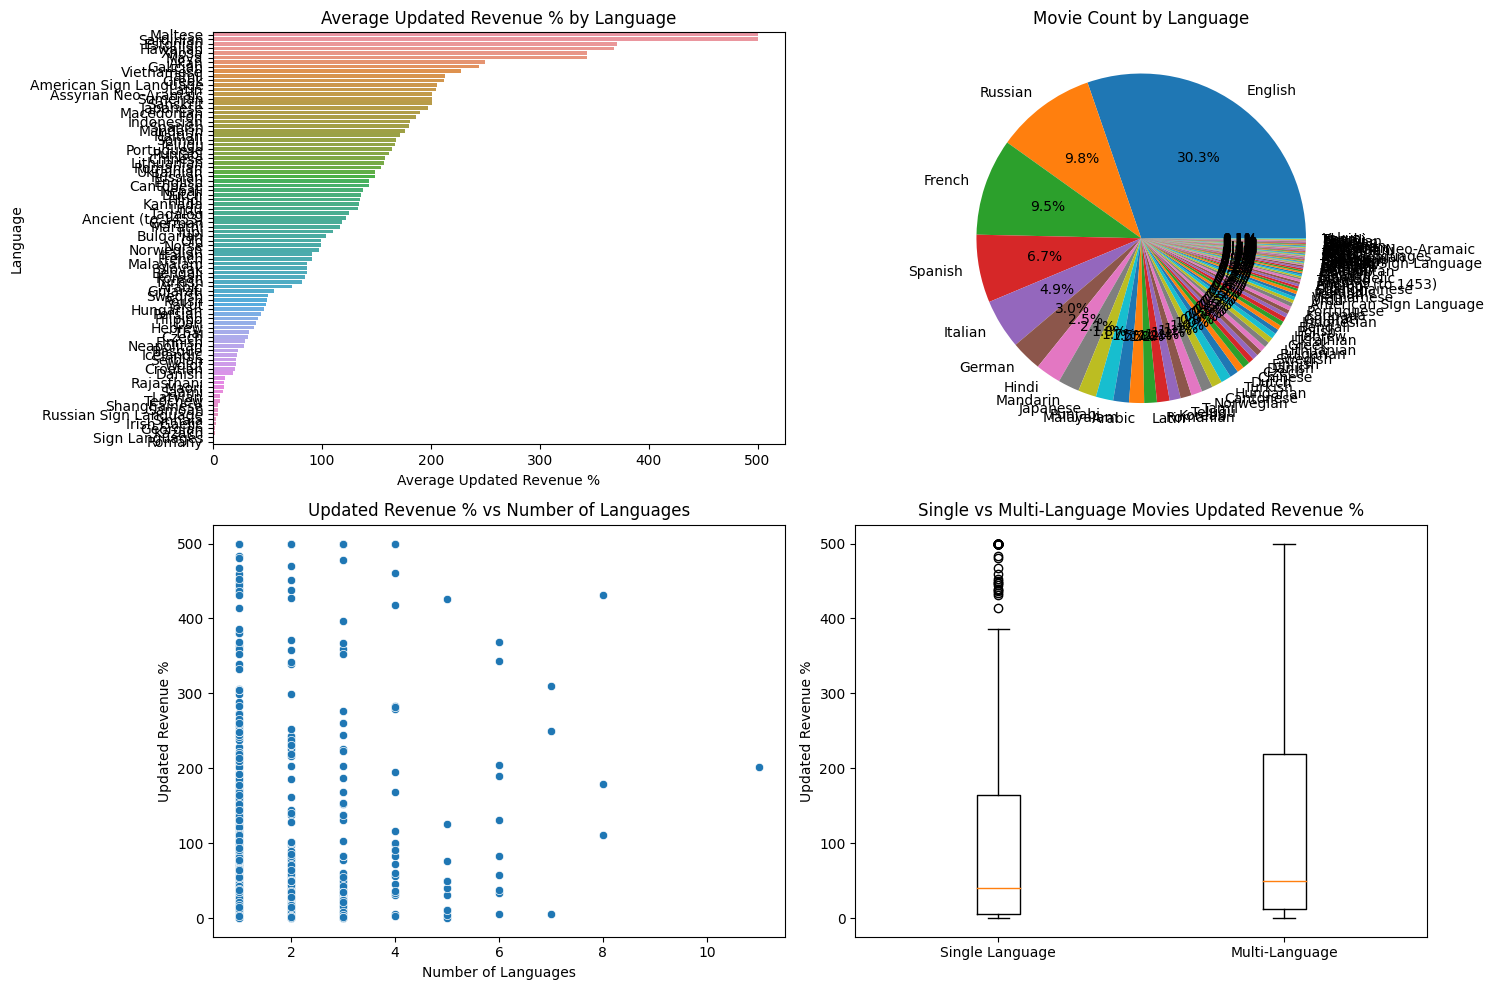

In [ ]:


# Preprocessing the data for the visualizations
# Splitting the 'Movie Languages' into individual languages
all_languages = df_movies['Movie Languages'].str.split(', ', expand=True).stack()
# Merging with the original data to get the corresponding Updated Revenue %
all_languages_data = all_languages.reset_index(level=1, drop=True).to_frame('Language').join(df_movies[['Updated Revenue %']])

# 1. Bar Chart of Average Updated Revenue % by Language
avg_revenue_by_language = all_languages_data.groupby('Language')['Updated Revenue %'].mean().sort_values(ascending=False)

# 2. Pie Chart of Movie Count by Language
language_count = all_languages_data['Language'].value_counts()

# 3. Scatter Plot of Updated Revenue % vs Number of Languages
df_movies['Number of Languages'] = df_movies['Movie Languages'].apply(lambda x: len(x.split(', ')))
scatter_data = df_movies[['Number of Languages', 'Updated Revenue %']]

# 8. Comparative Analysis Between Single-Language and Multi-Language Movies
single_language = df_movies[df_movies['Number of Languages'] == 1]['Updated Revenue %']
multi_language = df_movies[df_movies['Number of Languages'] > 1]['Updated Revenue %']

# Creating the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Average Updated Revenue % by Language
sns.barplot(x=avg_revenue_by_language, y=avg_revenue_by_language.index, ax=axes[0, 0])
axes[0, 0].set_title('Average Updated Revenue % by Language')
axes[0, 0].set_xlabel('Average Updated Revenue %')
axes[0, 0].set_ylabel('Language')

# Plot 2: Pie Chart of Movie Count by Language
axes[0, 1].pie(language_count, labels=language_count.index, autopct='%1.1f%%')
axes[0, 1].set_title('Movie Count by Language')

# Plot 3: Scatter Plot of Updated Revenue % vs Number of Languages
sns.scatterplot(data=scatter_data, x='Number of Languages', y='Updated Revenue %', ax=axes[1, 0])
axes[1, 0].set_title('Updated Revenue % vs Number of Languages')
axes[1, 0].set_xlabel('Number of Languages')
axes[1, 0].set_ylabel('Updated Revenue %')

# Plot 4: Comparative Analysis Between Single-Language and Multi-Language Movies
axes[1, 1].boxplot([single_language, multi_language], labels=['Single Language', 'Multi-Language'])
axes[1, 1].set_title('Single vs Multi-Language Movies Updated Revenue %')
axes[1, 1].set_ylabel('Updated Revenue %')

plt.tight_layout()
plt.show()



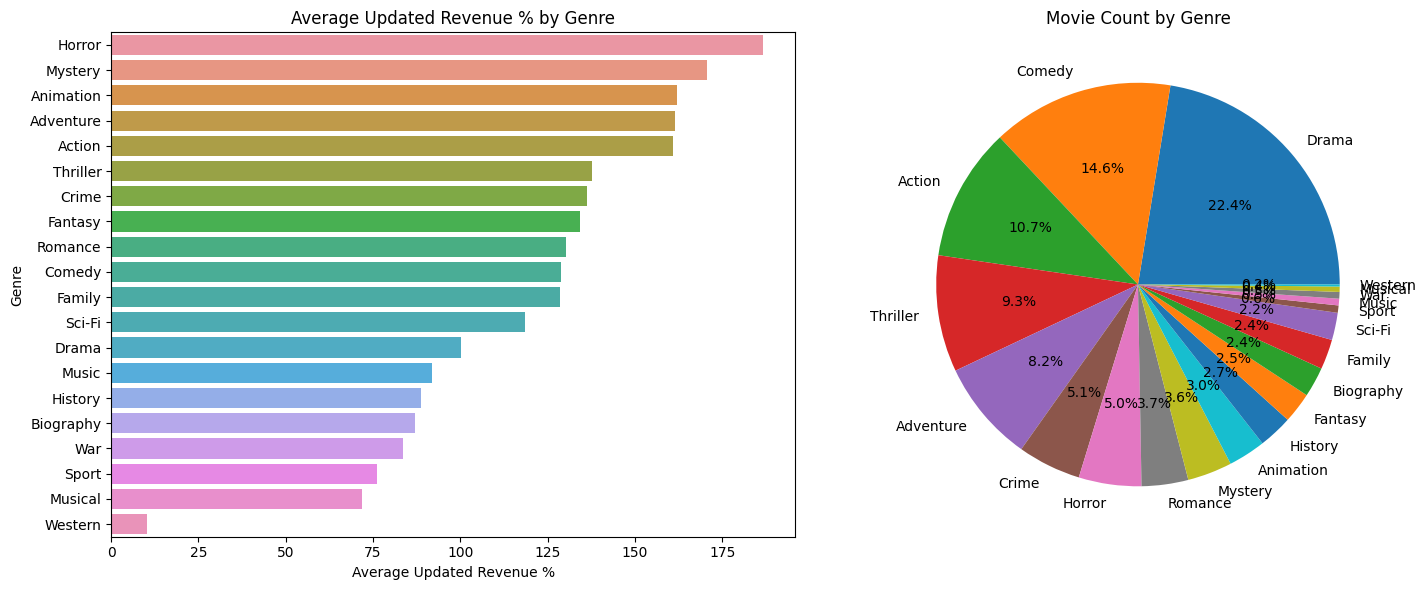

In [ ]:

# Splitting the 'Movie Genre' into individual genres
all_genres = df_movies['Movie Genre'].str.split(', ', expand=True).stack()
# Merging with the original data to get the corresponding Updated revenue %
all_genres_data = all_genres.reset_index(level=1, drop=True).to_frame('Genre').join(df_movies[['Updated Revenue %']])

# Bar Chart of Average Updated Revenue % by Genre
avg_revenue_by_genre = all_genres_data.groupby('Genre')['Updated Revenue %'].mean().sort_values(ascending=False)

# Pie Chart of Movie Count by Genre
genre_count = all_genres_data['Genre'].value_counts()

# Creating the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Average Updated Revenue % by Genre
sns.barplot(x=avg_revenue_by_genre, y=avg_revenue_by_genre.index, ax=axes[0])
axes[0].set_title('Average Updated Revenue % by Genre')
axes[0].set_xlabel('Average Updated Revenue %')
axes[0].set_ylabel('Genre')

# Plot 2: Pie Chart of Movie Count by Genre
axes[1].pie(genre_count, labels=genre_count.index, autopct='%1.1f%%')
axes[1].set_title('Movie Count by Genre')

plt.tight_layout()
plt.show()


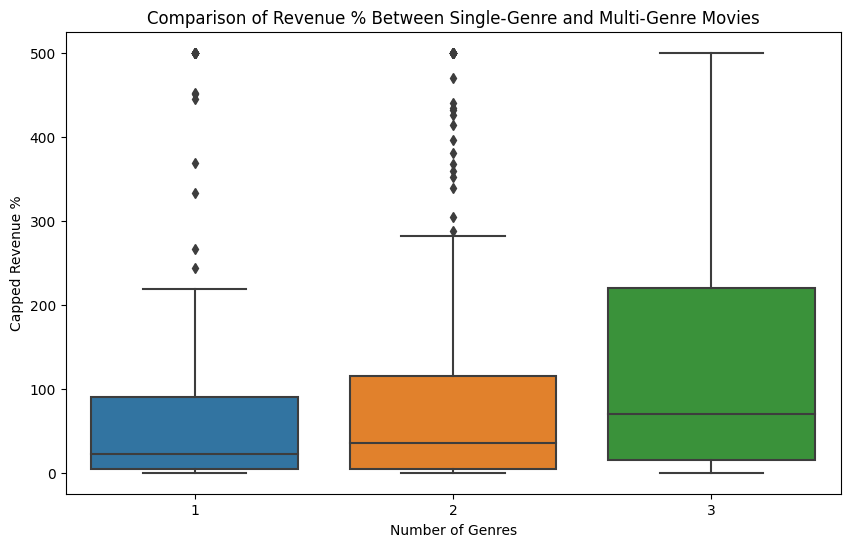

In [ ]:

# Counting the number of genres for each movie
df_movies['Number of Genres'] = df_movies['Movie Genre'].apply(lambda x: len(x.split(', ')))

# Separating the data into single-genre and multi-genre movies
single_genre_data = df_movies[df_movies['Number of Genres'] == 1]['Updated Revenue %']
multi_genre_data = df_movies[df_movies['Number of Genres'] > 1]['Updated Revenue %']

# Calculating and comparing the average revenue % between single-genre and multi-genre movies
avg_revenue_single_genre = single_genre_data.mean()
avg_revenue_multi_genre = multi_genre_data.mean()

avg_revenue_single_genre, avg_revenue_multi_genre


plt.figure(figsize=(10, 6))
sns.boxplot(x='Number of Genres', y='Updated Revenue %', data=df_movies)
plt.title('Comparison of Revenue % Between Single-Genre and Multi-Genre Movies')
plt.xlabel('Number of Genres')
plt.ylabel('Capped Revenue %')
plt.show()


In [ ]:
# Perform binning on the Revenue % column
df_movies["Rating Binns"] = pd.cut(df_movies["Movie Rating"],
                                                      bins=[1,4, 7, 10],
                                                      labels=["Low", "Medium", "High"])
df_movies["Revenue % Bins"] = pd.cut(df_movies["Updated Revenue %"],
                                                      bins=[0, 90, 100, 200, 500],
                                                      labels=["Low", "Medium", "High", "Very High"])

In [ ]:
df_movies.head()

df_movies_copy = df_movies

<ipython-input-16-e3d8814a8266>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Number of Languages', y='Rating Binns', data=df_movies, jitter=True, palette="Set1")


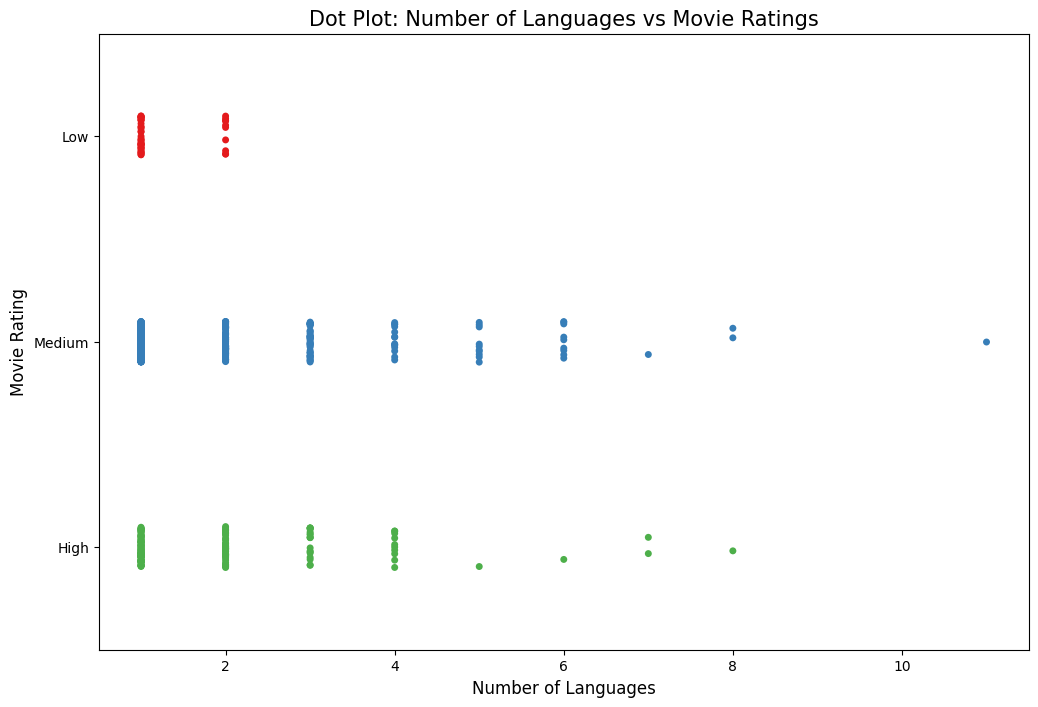

In [ ]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='Number of Languages', y='Rating Binns', data=df_movies, jitter=True, palette="Set1")

# Setting plot title and labels
plt.title('Dot Plot: Number of Languages vs Movie Ratings', fontsize=15)
plt.xlabel('Number of Languages', fontsize=12)
plt.ylabel('Movie Rating', fontsize=12)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Handling missing values
data_clean = df_movies_copy.dropna()

# Feature Selection
features =  ['Movie Rating', 'Movie Votes', 'Movie Revenue', 'Movie Year',
            'Movie Duration', 'Movie Budget', 'Number of Languages',
            'Number of Genres', 'Rating Binns Encoded']
X = data_clean[features]

X = data_clean[features]
y = data_clean['Revenue % Bins']

# Encoding Categorical Data
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Data Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



In [ ]:
# Building the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Confusion Matrix:
[[ 17   0   0   0]
 [  0 104   0   0]
 [  0   0   2   0]
 [  0   0   0  38]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        38

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [ ]:
#Random forest for predicting 'Revenue % Bins'

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Selecting features and target for the model
# Here, we'll predict 'Revenue % Bins' based on selected features
features = ['Movie Rating', 'Movie Votes', 'Movie Year', 'Movie Duration',
            'Movie Budget', 'Number of Languages', 'Number of Genres']
target = 'Revenue % Bins'

# Preparing the data
X = df_movies_copy[features]
y = df_movies_copy[target]

# Handling any missing values
X.fillna(X.mean(), inplace=True)

# Encoding the target variable since Random Forest requires numeric input
y, target_labels = pd.factorize(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
ran_forest_predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, ran_forest_predictions)
classification_report = classification_report(y_test, ran_forest_predictions, target_names=target_labels)

conf_matrix = confusion_matrix(y_test, ran_forest_predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report)


<ipython-input-83-46a12320bf26>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Confusion Matrix:
[[137  10   4   0]
 [ 25  33   3   0]
 [ 25   4   0   0]
 [  2   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

         Low       0.72      0.91      0.81       151
   Very High       0.70      0.54      0.61        61
        High       0.00      0.00      0.00        29
      Medium       0.00      0.00      0.00         2

    accuracy                           0.70       243
   macro avg       0.36      0.36      0.35       243
weighted avg       0.63      0.70      0.65       243



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df_movies_copy['Revenue % Bins Encoded'] = label_encoder.fit_transform(df_movies_copy['Revenue % Bins'])
# Selecting features and new target ('Rating Binns')
features = ['Movie Votes', 'Movie Year', 'Movie Duration', 'Movie Budget', 'Number of Languages', 'Number of Genres', 'Revenue % Bins Encoded']
target = 'Rating Binns'


# Preparing the data
X = df_movies_copy[features]
y = pd.factorize(df_movies_copy[target])[0]  # Encoding the categorical target

# Handling any missing values in features
X.fillna(X.mean(), inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

conf_matrix = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


<ipython-input-101-7cce6f2710ee>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Confusion Matrix:
[[ 15  40   0]
 [ 14 165   0]
 [  1   7   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        55
           1       0.78      0.92      0.84       179
           2       1.00      0.11      0.20         9

    accuracy                           0.74       243
   macro avg       0.76      0.44      0.47       243
weighted avg       0.72      0.74      0.71       243

